<a href="https://colab.research.google.com/github/amargauge26/data_analyst/blob/main/4_DATE_PARSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("/content/catalog.csv")

# set seed for reproducibility
np.random.seed(0)

In [3]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [4]:
landslides["date"].head()

,date
0,3/2/07
1,3/22/07
2,4/6/07
3,4/14/07
4,4/15/07


In [5]:
landslides["date"].dtype

dtype('O')

In [7]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [9]:
landslides['date_parsed'].head()

,date_parsed
0,2007-03-02
1,2007-03-22
2,2007-04-06
3,2007-04-14
4,2007-04-15


In [11]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)

<ipython-input-11-63a59a4f5533>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)
<ipython-input-11-63a59a4f5533>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)


In [13]:
day_of_month_landslides = landslides["date_parsed"].dt.day
day_of_month_landslides.head(10)

,date_parsed
0,2.0
1,22.0
2,6.0
3,14.0
4,15.0
5,20.0
6,24.0
7,21.0
8,27.0
9,27.0


In [14]:
day_of_month_landslides = day_of_month_landslides.dropna()

In [15]:
day_of_month_landslides

,date_parsed
0,2.0
1,22.0
2,6.0
3,14.0
4,15.0
...,...
1688,7.0
1689,22.0
1690,23.0
1691,26.0


<ipython-input-16-a20c6420591a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_landslides, kde=False, bins=31)


<Axes: xlabel='date_parsed'>

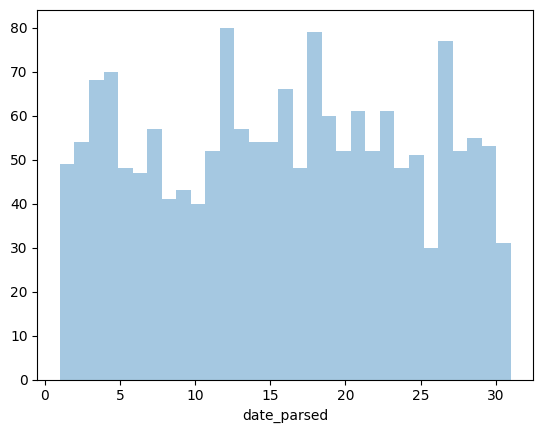

In [16]:
sns.distplot(day_of_month_landslides, kde=False, bins=31)